In [1]:
# HIDDEN_CELL
# You can ignore this code block, it's just here to get some functions from the previous notebook!

def interpolate_numbers(start, final, x):
    return start + ((final - start) * x)

def interpolate_colours(start, final, x):
    # Break the colours back into their RGB components
    [start_red, start_green, start_blue] = start
    [final_red, final_green, final_blue] = final

    # Interpolate each component individually
    red = interpolate_numbers(start_red, final_red, x)
    green = interpolate_numbers(start_green, final_green, x)
    blue = interpolate_numbers(start_blue, final_blue, x)

    # Then package the components back up into the resulting colour:
    return [red, green, blue]

# The Mysterious Mandelbrot

## Chapter 3: Actually Interesting

### Functional Analysis

_Functional analysis_ just means the analysis of functions. Or investigating how functions behave, and their interesting features.

Let's say we have some function that multiplies a number over and over and over and over.... again:

In [2]:
def multiply_over_and_over(x):
    return x ** 20

If we give this function a small number, it will shrink down to zero:

In [3]:
multiply_over_and_over(0.8)

0.011529215046068483

And if we give it a larger number it'll blow up to infinity!

In [4]:
multiply_over_and_over(3.0)

3486784401.0

Notice how a very small difference in the input gives a very large difference in the output!

What value of $x$ is between making very small numbers, and making very large numbers?

### The Mandelbrot!

This is magical function which "samples the Mandelbrot function":

In [5]:
def sample_mandelbrot(x, y, max_iterations):
    c = complex(x, y)
    z = 0 + 0j
    for i in range(max_iterations):
        if abs(z) > 2.0:
            return i
        z = z * z + c
    return max_iterations

We can give it some coordinate $(x, y)$ and it returns back the number of iterations required to escape a circle:

In [6]:
max_iterations = 1000

sample_mandelbrot(0.5, 0.2, max_iterations)

5

We don't really need to worry about what this means for now, we just need to know it's a **REALLY** interesting function!

It returns wildly different outputs for small changes in input.

Let's _sweep_ the value of $x$ between $-2.0$ and $2.0$, whilst keeping $y$ constant:

In [7]:
y = 0.4
for i in range(-19, 9):
    x = 0.1 * i

    result = sample_mandelbrot(x, y, max_iterations)
    print(result)

3
3
3
3
4
5
7
7
7
7
7
7
11
1000
1000
1000
1000
1000
1000
1000
1000
1000
1000
9
5
4
3
3


We can get a better picture of what's going on by sweeping across $x$ **AND** $y$:

In [8]:
for j in range(-15, 15):
    y = j * 0.1

    line = ""
    for i in range(-19, 9):
        x = i * 0.1
        
        result = sample_mandelbrot(x, y, max_iterations)
        line += f"{result:>5}"

    print(line)

    1    1    1    1    1    1    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2
    1    1    1    1    1    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2    2
    1    1    1    1    2    2    2    2    2    2    2    2    3    3    3    3    3    2    2    2    2    2    2    2    2    2    2    2
    1    1    1    2    2    2    2    2    3    3    3    3    3    3    3    3    3    3    3    3    3    2    2    2    2    2    2    2
    1    1    1    2    2    2    3    3    3    3    3    3    3    3    4    4    4   19    5    4    4    3    3    2    2    2    2    2
    1    1    2    2    2    3    3    3    3    3    3    3    3    4    4    4    5    7    9 1000    4    4    3    3    2    2    2    2
    1    1    2    3    3    3    3    3    3    3    3    4    4    4    4    5    6    9   24    8    5    4    4    3    3    3    2    2
    1    2   

## Picture time!

It would be much more convenient to visualise this a picture. Let's use the `interpolate_colours` function we made last time to turn each of the numbers into a colour. The `start` value should be `1`, as that's the smallest number we see, and the `final` value should be `1000`, as that's the biggest number we see.

Additionally, instead of printing out each of the numbers, we'll write them into a picture so we can save it!

Let's start by writing a function, which samples our function in a grid like we just did:

In [9]:
import numpy as np

def sample_function_over_rectangle(func, start, final, width, height, max_iterations):
    x_min, y_min = start
    x_max, y_max = final

    x_values = np.linspace(x_min, x_max, width)
    y_values = np.linspace(y_min, y_max, height)
    
    result_array = np.zeros((height, width))
    
    for j, y in enumerate(y_values):
        for i, x in enumerate(x_values):
            result_array[j, i] = func(x, y, max_iterations)
    
    return result_array

In [10]:
start = [-2.0, -1.5]
final = [2.0, 1.5]
width = 100
height = 100
max_iterations = 1000

data = sample_function_over_rectangle(sample_mandelbrot, start, final, width, height, max_iterations)

print(data)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


That's the same data as we had above, but presented differently (some values in the middle left out so it prints out in a small space).

Let's transform each of the numbers into a colour:

In [11]:
def colour_map(value):
    start_colour = [255, 0, 0]
    final_colour = [0, 0, 255]
    return interpolate_colours(start_colour, final_colour, value)

def colourize(values):
    return colour_map(values)

colour_array = colourize(data)[0]

Finally, save the image as a picture:

In [14]:
from PIL import Image

def save_image(colour_array, filename):
    image = Image.fromarray(colour_array, 'RGB')
    image.save(filename)

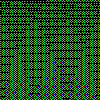

In [16]:
image = Image.fromarray(colour_array, 'RGB')
display(image)